# Tick Alignments

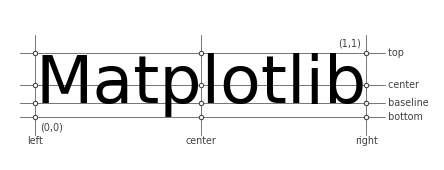

In [1]:
# -----------------------------------------------------------------------------
# Matplotlib cheat book
# Released under the BSD License
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

dpi = 100
fig = plt.figure(figsize=(4.25, 1.5), dpi=dpi)
ax = fig.add_axes([0,0,1,1], frameon=False,
                  xlim=(0,4.25), ylim=(0,1.5), xticks=[], yticks=[])

fontsize = 48
renderer = fig.canvas.get_renderer()
horizontalalignment = "left"
verticalalignment = "center"
position = (0.25, 1.5/2)
color = "0.25"

# Compute vertical and horizontal alignment offsets
text = ax.text(0, 0, "Matplotlib", fontsize=fontsize)
yoffset = {}
for alignment in ["top", "center", "baseline", "bottom"]:
    text.set_verticalalignment(alignment)
    y = text.get_window_extent(renderer).y0/dpi
    yoffset[alignment] = y

xoffset = {}
for alignment in ["left", "center", "right"]:
    text.set_horizontalalignment(alignment)
    x = text.get_window_extent(renderer).x0/dpi
    xoffset[alignment] = x

# Actual positioning of the text
text.set_horizontalalignment(horizontalalignment)
text.set_verticalalignment(verticalalignment)
text.set_position(position)


for name,y in yoffset.items():
    y = position[1] - y + yoffset[verticalalignment]
    plt.plot([0.1, 3.75], [y, y], linewidth=0.5, color=color)
    plt.text(3.75, y, " "+name, color=color,
             ha="left", va="center", size="x-small")

for name,x in xoffset.items():
    x = position[0] - x + xoffset[horizontalalignment]
    plt.plot([x,x], [0.25, 1.25], linewidth=0.5, color=color)
    plt.text(x, 0.24, name, color = color,
             ha="center", va="top", size="x-small")

P = []
for x in xoffset.values():
    x = position[0] - x + xoffset[horizontalalignment]
    for y in yoffset.values():
        y = position[1] - y + yoffset[verticalalignment]
        P.append((x,y))
P = np.array(P)

ax.scatter(P[:,0], P[:,1], s=10, zorder=10,
           facecolor="white", edgecolor=color, linewidth=0.75)

epsilon = 0.05
plt.text(P[3,0]+epsilon, P[3,1]-epsilon, "(0,0)",
         color=color, ha="left", va="top", size="x-small")
plt.text(P[8,0]-epsilon, P[8,1]+epsilon, "(1,1)",
         color=color, ha="right", va="bottom", size="x-small")

#plt.savefig("../figures/text-alignments.pdf")
plt.show()